In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read train and test data
train = pd.read_csv('madfhantr.csv')
test = pd.read_csv('madhante.csv')

In [3]:
# Size of the data
train.shape

(614, 13)

In [4]:
# First 5 rows of the data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [6]:
# Missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0] )
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().median() )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0] )
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0] )

## Let's plot the above data

Text(0.5, 1.0, 'Dependents distribution')

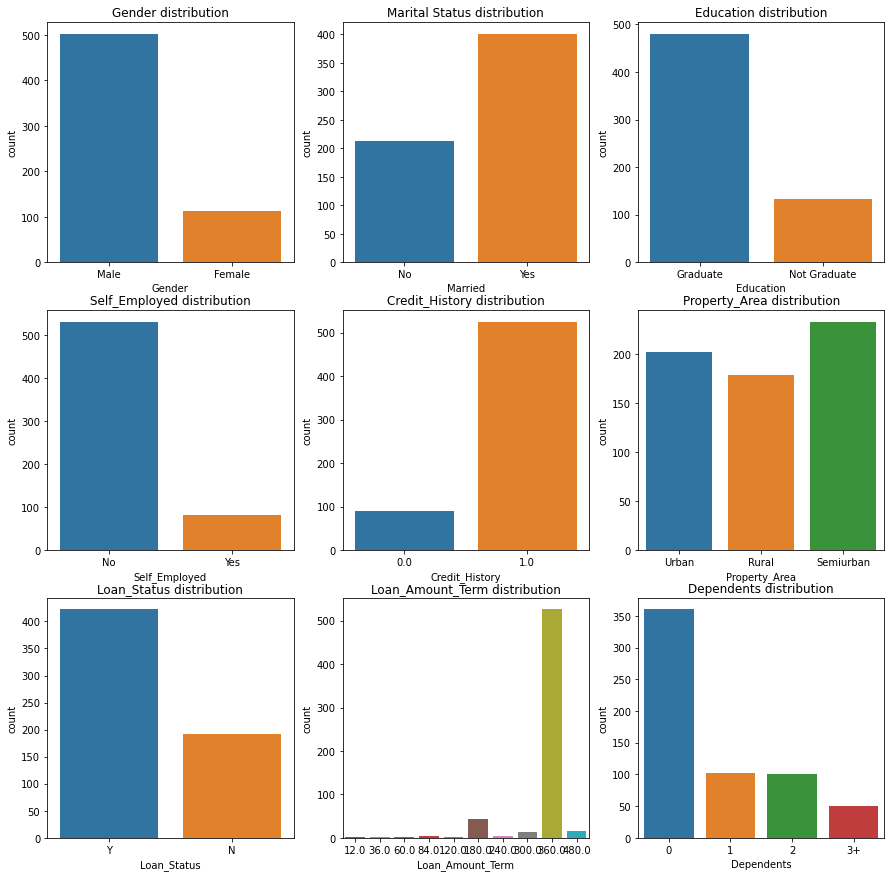

In [8]:
f,ax=plt.subplots(3,3,figsize=(15,15))
    
sns.countplot('Gender',data=train,ax=ax[0,0])
ax[0,0].set_title('Gender distribution')
    
sns.countplot('Married',data=train,ax=ax[0,1])
ax[0,1].set_title('Marital Status distribution')
    
sns.countplot('Education',data=train,ax=ax[0,2])
ax[0,2].set_title('Education distribution')
    
sns.countplot('Self_Employed',data=train,ax=ax[1,0])
ax[1,0].set_title('Self_Employed distribution')
    
sns.countplot('Credit_History',data=train,ax=ax[1,1])
ax[1,1].set_title('Credit_History distribution')
    
sns.countplot('Property_Area',data=train,ax=ax[1,2])
ax[1,2].set_title('Property_Area distribution')
    
sns.countplot('Loan_Status',data=train,ax=ax[2,0])
ax[2,0].set_title('Loan_Status distribution')
    
sns.countplot('Loan_Amount_Term',data=train,ax=ax[2,1])
ax[2,1].set_title('Loan_Amount_Term distribution')
    
sns.countplot('Dependents',data=train,ax=ax[2,2])
ax[2,2].set_title('Dependents distribution')

In [9]:
# importances = pd.Series(train.feature_importances_,index=x.columns)
# importnaces.plot(kind='bar',figsize=)

## Here we will check the status of loan against various factors as follows :

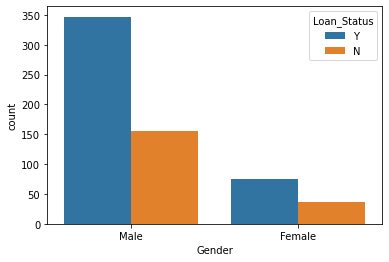

In [10]:
sns.countplot(x='Gender',hue='Loan_Status',data=train)

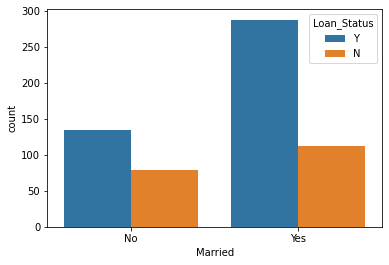

In [11]:
sns.countplot(x='Married',hue='Loan_Status',data=train)

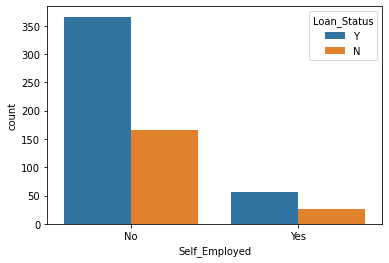

In [12]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train)

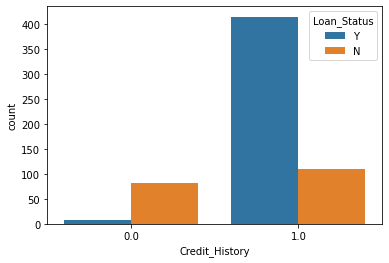

In [13]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train)

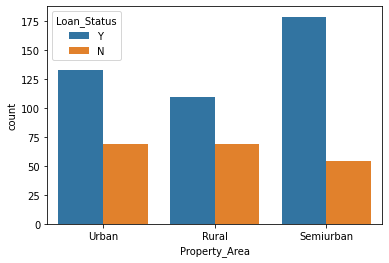

In [14]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)

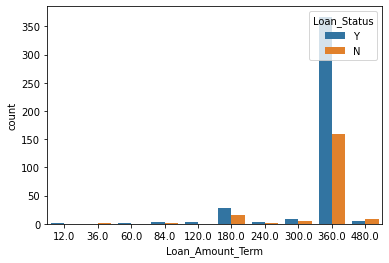

In [15]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=train)

In [16]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
tt = train['Loan_ID']
#drop the uniques loan id
train.drop('Loan_ID', axis = 1, inplace = True)

In [17]:
Dependents_ = pd.to_numeric(train.Dependents)
Dependents__ = pd.to_numeric(test.Dependents)
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)
train = pd.concat([train, Dependents_], axis = 1)
test = pd.concat([test, Dependents__], axis = 1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


## Model for predicting the loan_status

In [19]:
# Separating the target values
y = train['Loan_Status']
X = train.drop('Loan_Status', axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Making model using Logistic Regression

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HARSHITA\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
ypred = model.predict(X_test)
ypred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [24]:
data_frame=train[['Loan_Status']]
data_frame = pd.concat([tt, data_frame], axis = 1)
data_frame.loc[data_frame.Loan_Status==0,'Loan_Status']='N'
data_frame.loc[data_frame.Loan_Status==1,'Loan_Status']='Y'

data_frame.head()

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,N
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y


In [25]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

### Making model using RandomForestClassifier

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
ypred = model.predict(X_test)
ypred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [28]:
data_frame=train[['Loan_Status']]
data_frame = pd.concat([tt, data_frame], axis = 1)
data_frame.loc[data_frame.Loan_Status==0,'Loan_Status']='N'
data_frame.loc[data_frame.Loan_Status==1,'Loan_Status']='Y'

data_frame.head()

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,N
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y


In [29]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8586387434554974

### Making model using DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
ypred = model.predict(X_test)
ypred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [32]:
data_frame=train[['Loan_Status']]
data_frame = pd.concat([tt, data_frame], axis = 1)
data_frame.loc[data_frame.Loan_Status==0,'Loan_Status']='N'
data_frame.loc[data_frame.Loan_Status==1,'Loan_Status']='Y'

data_frame.head()

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,N
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y


In [33]:
evaluation = f1_score(y_test, ypred)
evaluation

0.7719298245614035